### Lab3 Neural Network From Scratch
Abderrhamane Adda and Zhan CHEN

There are 3 parts in this notebook.
At the first time, we implement Neural Network(NN) from scratch. 
Secondly, we prepare the data set for machine learning(train and test sets). 
And lastly, we use the prepared datasets for machine learning using NN from scratch and NN from KERAS.

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


def sigmoid(s):
    return 1/(1 + np.exp(-s))

def sigmoid_derv(x):
    return sigmoid(x)*(1 - sigmoid(x))


def error(pred, real):
    n_samples = real.shape[0]
    logp = - np.log(pred[np.arange(n_samples), real.argmax(axis=1)])
    loss = np.sum(logp)/n_samples
    return loss

class Neural_Network_From_Scratch:
    def __init__(self, x, y):
        self.x = x
        neurons = 128
        self.lr = 0.5
        input_dim = x.shape[1]
        output_dim = y.shape[1]

        self.w1 = np.random.randn(input_dim, neurons)
        self.b1 = np.zeros((1, neurons))
        
        self.w2 = np.random.randn(neurons, output_dim)
        self.b2 = np.zeros((1, output_dim))
        
        self.y = y

    def feedforward(self):
        z1 = np.dot(self.x, self.w1) + self.b1
        self.a1 = sigmoid(z1)
        z2 = np.dot(self.a1, self.w2) + self.b2
        self.a2 = sigmoid(z2)

        
        
    def backprop(self):
        #loss = error(self.a3, self.y)
        loss = error(self.a2, self.y)
        #print('Error :', loss)
 
        
        z2_delta = (self.a2 - self.y)/len(self.a2)
        a2_delta = z2_delta * sigmoid_derv(self.a2) # w2
        
        
        z1_delta = np.dot(a2_delta, self.w2.T)
        a1_delta = z1_delta * sigmoid_derv(self.a1) # w1
        
        
        self.w2 -= self.lr * np.dot(self.a1.T, a2_delta)
        self.b2 -= self.lr * np.sum(a2_delta, axis=0)
        
        self.w1 -= self.lr * np.dot(self.x.T, a1_delta)
        self.b1 -= self.lr * np.sum(a1_delta, axis=0)
        
        return loss

    def predict(self, data):
        self.x = data
        self.feedforward()
        return self.a2.argmax()
    
def accuracy(x, y):
    accuracy = 0
    for xx,yy in zip(x, y):
        s = NNFS.predict(xx)
        if s == np.argmax(yy):
            accuracy +=1
    return accuracy/len(x)*100


### Part 2 dataset preparation

In [19]:
import numpy as np
  
data = np.loadtxt("features.txt",delimiter=',') 
  
labels_raw = np.loadtxt("labels.txt",delimiter=',') 
  

#replace labels 10 by 0
labels = np.where(labels_raw==10, 0, labels_raw) 

#randonise the dataset:
from sklearn.utils import shuffle
data_shuffled, labels_shuffled = shuffle(data, labels, random_state=0)


#split the dataset into train and test
train_images = data_shuffled[:4000]
test_images = data_shuffled[4000:]

train_labels = labels_shuffled[:4000]
test_labels = labels_shuffled[4000:]


train_onehot_labels = np.array(pd.get_dummies(train_labels))
test_onehot_labels = np.array(pd.get_dummies(test_labels))

### Part 3 machine learning applications

#### 3.1 Using NN implemented from scratch

Training accuracy :  88.325
Test accuracy :  86.6


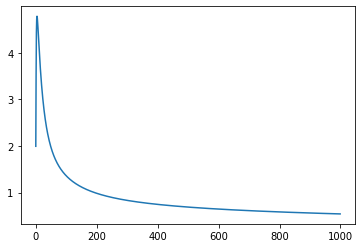

In [20]:
NNFS = Neural_Network_From_Scratch(train_images, train_onehot_labels)

epochs = 1000

loss_list = []

for x in range(epochs):
    NNFS .feedforward()
    loss = NNFS.backprop()
    loss_list.append(loss)
    
plt.plot(range(epochs), loss_list)
plt.show

print("Training accuracy : ", accuracy(train_images, train_onehot_labels))
print("Test accuracy : ", accuracy(test_images, test_onehot_labels))

#### 3.2 Using KERAS

In [21]:
import tensorflow as tf
from tensorflow import keras

model = keras.Sequential([keras.layers.Flatten(input_shape=(400,)),
                        keras.layers.Dense(128,activation="sigmoid"),
                        keras.layers.Dense(10,activation="sigmoid")])

model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy',metrics=['accuracy'])
model.fit(train_images, train_labels, epochs = 100)

train_loss, train_acc = model.evaluate(train_images, train_labels,batch_size=128)
test_loss, test_acc = model.evaluate(test_images, test_labels,batch_size=128)

print("Train accuracy = ",train_acc )
print("Test accuracy = ",test_acc )

Train on 4000 samples
Epoch 1/100
4000/4000 [==============================] - 0s 85us/sample - loss: 1.6991 - accuracy: 0.6525
Epoch 2/100
4000/4000 [==============================] - 0s 35us/sample - loss: 0.8133 - accuracy: 0.8485
Epoch 3/100
4000/4000 [==============================] - 0s 39us/sample - loss: 0.5520 - accuracy: 0.8775
Epoch 4/100
4000/4000 [==============================] - 0s 43us/sample - loss: 0.4401 - accuracy: 0.8967
Epoch 5/100
4000/4000 [==============================] - 0s 42us/sample - loss: 0.3764 - accuracy: 0.9082
Epoch 6/100
4000/4000 [==============================] - 0s 44us/sample - loss: 0.3376 - accuracy: 0.9145
Epoch 7/100
4000/4000 [==============================] - 0s 43us/sample - loss: 0.3048 - accuracy: 0.9243
Epoch 8/100
4000/4000 [==============================] - 0s 42us/sample - loss: 0.2828 - accuracy: 0.9255
Epoch 9/100
4000/4000 [==============================] - 0s 38us/sample - loss: 0.2618 - accuracy: 0.9315
Epoch 10/100
4000/4000 [

4000/4000 [==============================] - 0s 39us/sample - loss: 0.0077 - accuracy: 1.0000
Epoch 78/100
4000/4000 [==============================] - 0s 38us/sample - loss: 0.0072 - accuracy: 1.0000
Epoch 79/100
4000/4000 [==============================] - 0s 38us/sample - loss: 0.0068 - accuracy: 1.0000
Epoch 80/100
4000/4000 [==============================] - 0s 39us/sample - loss: 0.0064 - accuracy: 1.0000
Epoch 81/100
4000/4000 [==============================] - 0s 39us/sample - loss: 0.0060 - accuracy: 1.0000
Epoch 82/100
4000/4000 [==============================] - 0s 38us/sample - loss: 0.0057 - accuracy: 1.0000
Epoch 83/100
4000/4000 [==============================] - 0s 39us/sample - loss: 0.0054 - accuracy: 1.0000
Epoch 84/100
4000/4000 [==============================] - 0s 38us/sample - loss: 0.0052 - accuracy: 1.0000
Epoch 85/100
4000/4000 [==============================] - 0s 39us/sample - loss: 0.0048 - accuracy: 1.0000
Epoch 86/100
4000/4000 [==========================

1000/1 [================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

Train accuracy =  1.0
Test accuracy =  0.939


Conclusion: with keras, we got a better accuracy (~94%) than with the NN from scracth (~85%), this may due to the optimizer 'adam' used in keras' NN model